# BLG 454E Term Project

## Team 2

### Fatih Baskın
#### 150210710

### Bilgenur Çelik
#### 150200063

# 1 Exploratory Data Analysis

## 1.1 Data Description and Data Types

From the feature description, we know that there are 7 histogram variables, corresponding to 70 features. From checking the column names manually, we have found that colums with these names:
* ag_000 to ag_009
* ay_000 to ay_008
* az_000 to az_009
* ba_000 to ba_009
* cn_000 to ba_009
* cn_000 to cn_009
* cs_000 to cs_009
* ee_000 to ee_009

are indeed histogram variables. Those are different from the rest of the data, which are just counters.

Also, from the kaggle challenge website, we have found out that most of the variables have 'na' values, which means NULL, we need to handle this issue.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

training_data_frame = pd.read_csv('data/aps_failure_training_set.csv', na_values='na')
print(training_data_frame.shape)
training_data_frame.head(5)

print(training_data_frame['class'].value_counts())

(60000, 172)
class
neg    59000
pos     1000
Name: count, dtype: int64


In [25]:
testing_data_frame = pd.read_csv('data/aps_failure_test_set.csv', na_values='na')
print(testing_data_frame.shape)
testing_data_frame.head(5)

(16000, 171)


,id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,2,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,3,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,4,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,5,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


Data has 60000 rows and 170 features.
with 59000 negative and 1000 positive. pos/neg ratio is imbalanced.
Undersampling can be applied over the majority which is neg rows

Feature names are encoded, it is harder for human interpretation.


## 1.2 Null Values

In [26]:
column_names = training_data_frame.columns.tolist()
null_count = training_data_frame.isnull().sum()
null_percent = null_count / training_data_frame.shape[0] * 100

show_null_info = pd.DataFrame({'null_count': null_count, 'null_percent': null_percent})
show_null_info.sort_values(by='null_percent', ascending=False, inplace=True)

show_null_info.head(10)

,null_count,null_percent
br_000,49264,82.106667
bq_000,48722,81.203333
bp_000,47740,79.566667
bo_000,46333,77.221667
cr_000,46329,77.215000
ab_000,46329,77.215000
bn_000,44009,73.348333
bm_000,39549,65.915000
bl_000,27277,45.461667
bk_000,23034,38.390000


As the result of counting nulls in the columns, the null counts are very severe in the given columns:
| column | null% | column | null% | column | null% | column | null% | column | null% | column | null% | column | null% |
| ------ | ----- | ------ | ----- | ------ | ----- | ------ | ----- | ------ | ----- | ------ | ----- | ------ | ----- |
| br_000 | 0.821 | bq_000 | 0.812 | bp_000 | 0.796 | bo_000 | 0.772 | cr_000 | 0.772 | ab_000 | 0.772 | bn_000 | 0.733 |
| bm_000 | 0.659 | bl_000 | 0.455 | bk_000 | 0.384 | cf_000 | 0.248 | cg_000 | 0.248 | ch_000 | 0.248 | co_000 | 0.248 |
| ad_000 | 0.248 | cv_000 | 0.230 | da_000 | 0.230 | cz_000 | 0.230 | cy_000 | 0.230 | cx_000 | 0.230 | db_000 | 0.230 |
| cu_000 | 0.230 | ct_000 | 0.230 | dc_000 | 0.230 | ec_00  | 0.171 | cm_000 | 0.165 | cl_000 | 0.159 | ed_000 | 0.159 |

We can drop these columns since they are mostly null.

In [27]:
# check for unnecessary columns where standard deviation is 0
numeric_columns = training_data_frame.select_dtypes(include='number').columns # this will prevent "class" column from being included
std_per_column = training_data_frame[numeric_columns].std()
unn_cols = std_per_column[std_per_column == 0].index
print(unn_cols)

Index(['cd_000'], dtype='object')


'cd_000' has std deviation 0. It needs to be dropped.

### 1.2.1 Null Columns Bar Graph

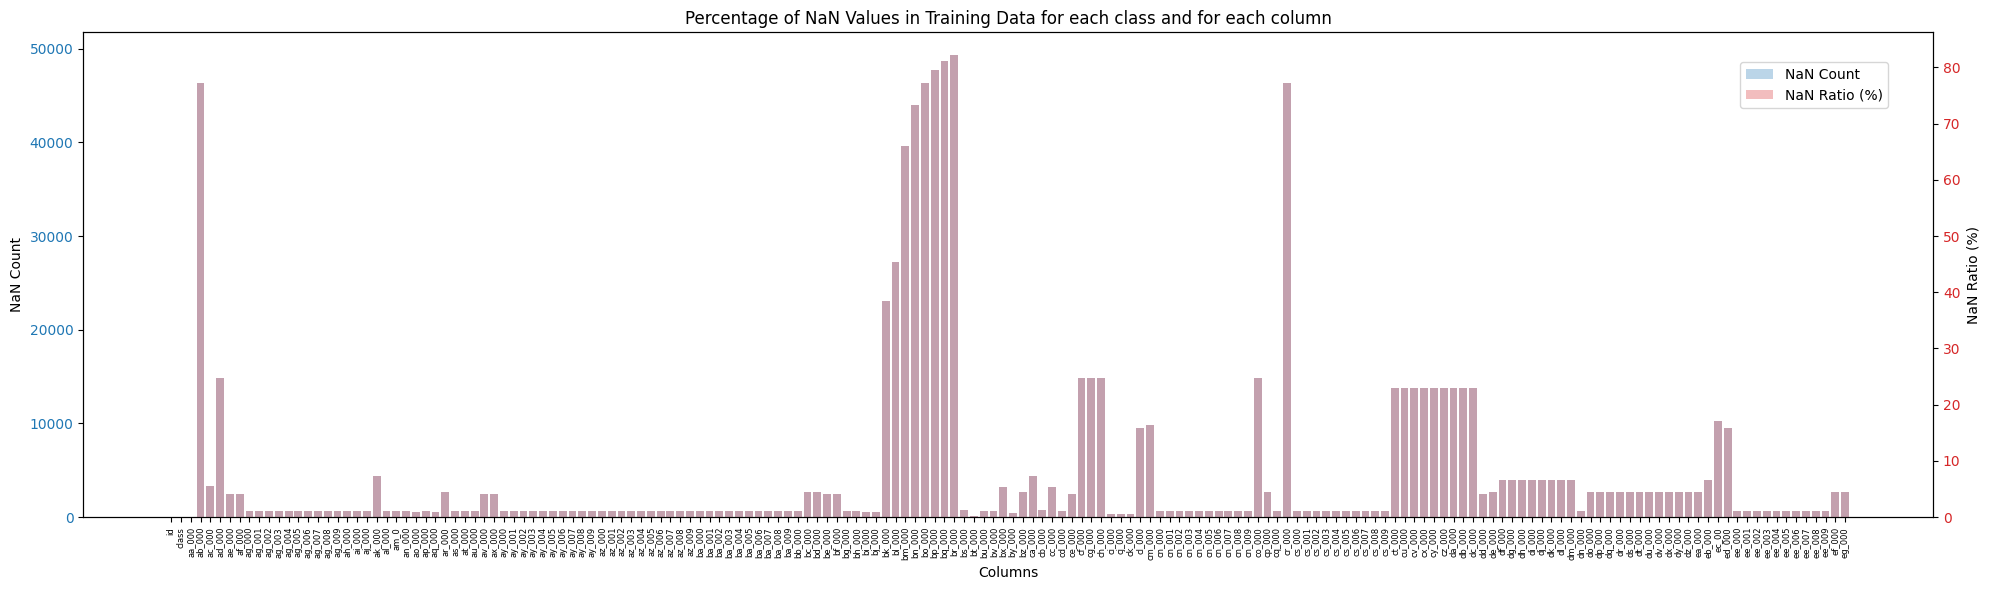

In [28]:
# Drop columns with more than 70% missing values
# plot how many na values and raito of na values in each column
na_count = training_data_frame.isnull().sum()
na_ratio = na_count / training_data_frame.shape[0] * 100
na_examination_df = pd.DataFrame(list(zip(training_data_frame.columns, na_count, na_ratio)), columns=['Column', 'NaN Count', 'NaN Ratio (%)'])

fig, ax1 = plt.subplots(figsize=(20, 6))
plt.xticks(rotation=90, fontsize=6)
# plot NaN count
ax1.bar(na_examination_df['Column'], na_examination_df['NaN Count'], color='tab:blue', alpha=0.3, label='NaN Count')
ax1.set_xlabel('Columns')
ax1.set_ylabel('NaN Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# plot NaN ratio
ax2 = ax1.twinx()
ax2.bar(na_examination_df['Column'], na_examination_df['NaN Ratio (%)'], color='tab:red', alpha=0.3, label='NaN Ratio (%)')
ax2.set_ylabel('NaN Ratio (%)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# set title and legend
plt.title('Percentage of NaN Values in Training Data for each class and for each column')
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.9))


plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

### 1.2.1 Null Columns HeatMap

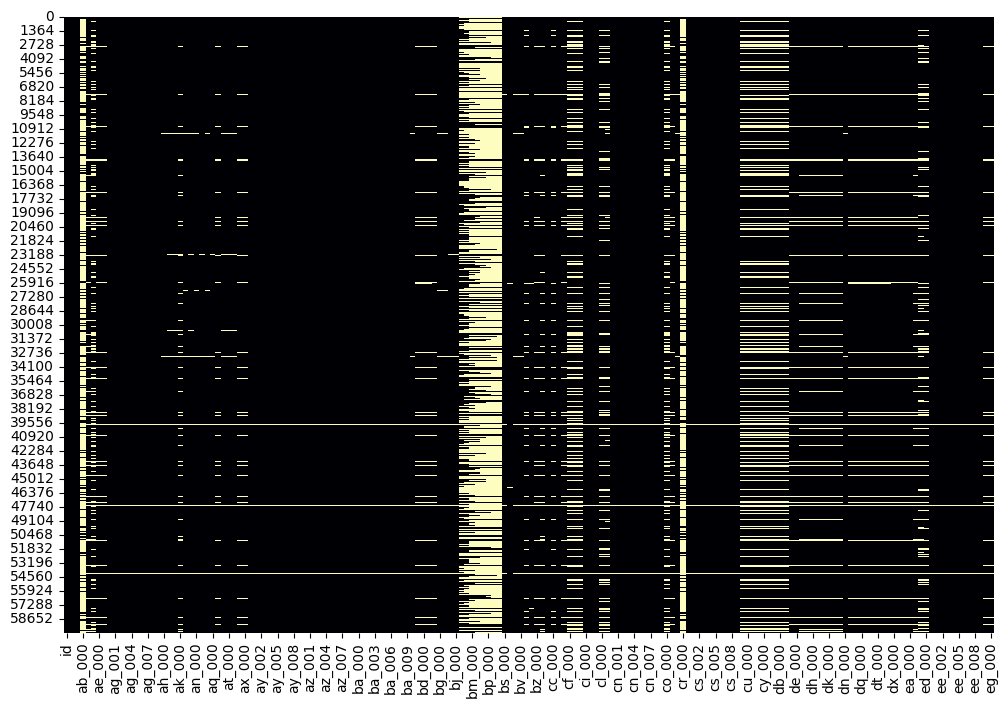

In [29]:
# heatmap of the missing values in the dataset
plt.figure(figsize=(12,8)) # You can adjust the figure size as per your requirement
sns.heatmap(training_data_frame.isnull(), cbar=False, cmap='magma')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()

## 1.3 correlation of Columns